Overview

Quantitatively understanding the statistical significance of scientific results requires us to perform a mathematical assessment of evidence from experiments. This small group project will teach us 

1) How to model a scientific experiment that includes an underlying relationship with both intrinsic randomness and experimental uncertainty.

2) Determine the significance of a measurement that deviates from the intrinsic randomness expected from an experiment.

3) Program Python functions to compute mathematical models and simulate experimental noise.

4) Plot models and data on the same graph using a Jupyter notebook, and provide a graphical representation of the statistical significance of an experimental event.

5) Develop code collaboratively using a standard development platform (GitHub).

 

Instructions

For our small group project, we will be simulating the ocean tides in Santa Cruz. Tides oscillate from a high state, to a low state, and back to a high state roughly every twelve hours. This pattern results in two high tides and two low tides each twenty-four-hour period. Additionally, the height of the high tide and the depth of the low tide oscillate, such that one high tide and one low tide are more extreme than the other. You will use your group COPY of this template to submitLinks to an external site. your Group Tidal Report to this Canvas Assignment before the due date. 

1) Download this data setLinks to an external site. that lists some tidal measurements Santa Cruz in January and February 2022. In your Jupyter notebook, define an oscillatory function in Python to describe the intra- and inter-day variations in the tide. DONE

2) Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.25 ft. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF. DONE

3) Next, have your notebook subtract off the best fit function from the data and plot the residuals. Assess graphically and mathematically deviations of the measured tidal data from the model. Plot a histogram of the residuals and measure the standard deviation. Is the scatter in the data larger than the assumed experimental error? Estimate the intrinsic scatter in the data after accounting for the assumed measurement error. Save the histogram as a PDF using our histogram best practices, including labeling of the data, axis labels, and "reasonable" bin widths as demonstrated in class.

4) During the first high-tide of January 14, the tsunami from the underwater eruption of the Hunga Tonga-Hunga Ha'apai volcano reached the shores of Santa Cruz. The tsunami increased water levels near high tide by about 2ft. How large of a deviation is this tsunami, in terms of standard deviations of the distribution of normal tides from the model? Add a single 2ft outlier to the histogram of data and replot it as part of your Jupyter notebook.

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [34]:
# Load tide data from a CSV file
with open("data.txt", "r") as infile:
    tide_data = infile.read().split("\n")

day, time, height = [], [], []


def militaryTimeToDay(time):
    hour, minute = map(int, time.split(":"))
    return hour / 24 + minute / 1440


for line in tide_data[3:]:
    line = line.lstrip(" ")
    lineData = line.split(" ")
    lineData = [x for x in lineData if x != ""]
    # print(lineData)
    day.append(int(lineData[0]))
    time.append(militaryTimeToDay(lineData[1]))
    height.append(float(lineData[2]))

x = np.array(day) + np.array(time)
y = np.array(height)
y_err = np.ones_like(y) * 0.25


# Define the oscillatory function
def func(x, a, b, c, d):
    return a * np.sin((b * x) + c) + d

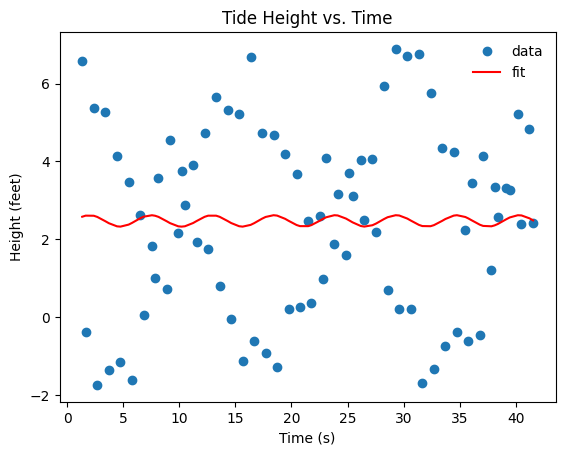

In [35]:
# Fit the oscillatory function to the tide data
params, _ = curve_fit(func, x, y, sigma=y_err)

# Plot the data and the best fit line
plt.plot(x, y, "o", label="data")
plt.plot(x, func(x, *params), "r-", label="fit")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Height (feet)")
plt.title("Tide Height vs. Time")
plt.legend(frameon=False)
fig1 = plt.gcf()
plt.show()
fig1.savefig("tide_height_over_time.pdf")

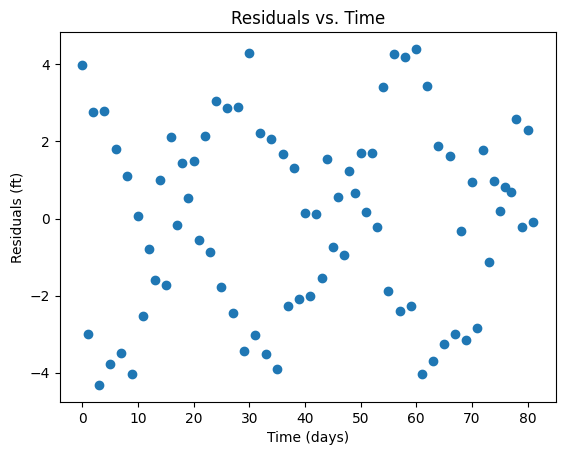

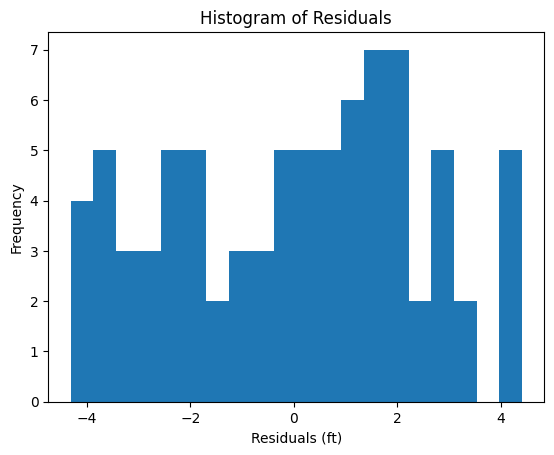

Standard deviation of residuals: 2.378390455479477
Intrinsic scatter in the data: [2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482 2.36521482
 2.36521482 2.36521482 2.36521482 2.36521482]


In [36]:
# Calculate the residuals
residuals = y - np.array(func(x, *params))

# Plot the residuals
plt.plot(residuals, 'o')
plt.xlabel('Time (days)')
plt.ylabel('Residuals (ft)')
plt.title('Residuals vs. Time')
plt.show()

# Plot a histogram of the residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.savefig('histogram_of_residuals.pdf', bbox_inches='tight')
plt.show()

# Calculate the standard deviation of the residuals
std_dev = np.std(residuals)

# Calculate the intrinsic scatter in the data
intrinsic_scatter = np.sqrt(std_dev**2 - y_err**2)

print('Standard deviation of residuals:', std_dev)
print('Intrinsic scatter in the data:', intrinsic_scatter)

Tsunami deviation from model: -0.24379624588365126 standard deviations


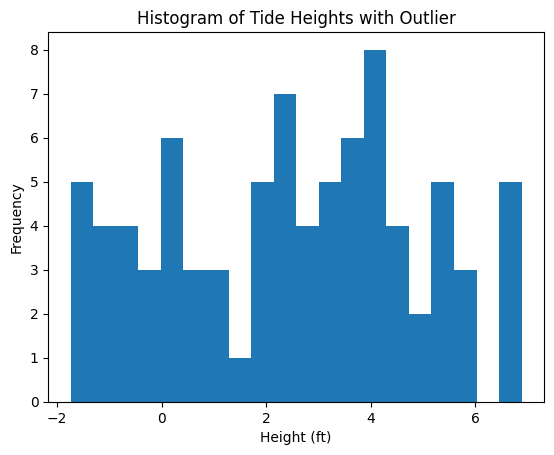

In [37]:
# Calculate the z-score of the tsunami height
tsunami_height = 2.0
tsunami_zscore = (tsunami_height - func(x[0], *params)) / np.std(residuals)

print('Tsunami deviation from model:', tsunami_zscore, 'standard deviations')

# Add a single 2ft outlier to the data and replot the histogram
y_outlier = np.append(y, 2.0)
plt.hist(y_outlier, bins=20)
plt.xlabel('Height (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Tide Heights with Outlier')
plt.show()